# Information sources

# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plt

# Functions

In [3]:
def freq_rel(dataframe, column):

    return [round(i/ dataframe[column].sum(),3)*100 for i in dataframe[column]]

In [4]:
def replace(dt, field, t, r): #OPTIMIZAR ESTA FUNÇÃO?
    #dt: dataframe
    #field: field from dataframe dt
    #t: text to replace
    #r: replace by
    
    return dt[field].apply(lambda x: r if x == t else x)

# TO DO:

 + Ajustar xlabel & ylabel para horizontal e vertical graphs
 + Criar funçã0 para stacked (or acrescentar outra condição). Valores default??
 + Tentar criar função que gere subplots para visões:
     + Ages
     + Region
     + Comunidad: aqui há muitas cidades!!

In [5]:
def graph_bar(kind, dataframe, column, title, legend, color):
    
    if kind == 'vertical':
        
        dataframe[column].plot.barh(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   xlabel = legend, ylabel = legend, rot=0, color = color, figsize = (15,10))
        plt.show();
    
    elif kind == 'horizontal':
        dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   xlabel = legend, ylabel = legend, rot=0, color = color, figsize = (15,10))
        plt.show();

In [6]:
def sort_data(dataframe, column):
    
    return pd.DataFrame(dataframe[column].sort_values())

## Data Market:
https://datamarket.es/#covid-19-dataset

We'll first explore the different data sets one can find in different sources regarding the covid information for Spain

In [7]:
db1 =pd.read_csv('covid-19-sample_1406.csv') 

In [8]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817440 entries, 0 to 817439
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   date               817440 non-null  object
 1   autonomous_region  817440 non-null  object
 2   province           817440 non-null  object
 3   sex                817440 non-null  object
 4   age_interval       817440 non-null  object
 5   num_infections     817440 non-null  int64 
 6   num_hosp           817440 non-null  int64 
 7   num_uci            817440 non-null  int64 
 8   num_dead           817440 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 56.1+ MB


## Data description

+ age_interval: Intervalo de años en el cual se ubica el grupo de análisis.
+ autonomous_region: Comunidad autónoma donde se registran los datos.
+ date: Fecha del momento en el cual se obtuvieron los datos.
+ num_dead: Número de muertes que se han producido en el grupo de análisis.
+ num_hosp: Número de hospitalizaciones que ha tenido el grupo de análisis.
+ num_infections: Número de infecciones que han se han reportado en el grupo de análisis.
+ num_uci: Número de ingresos en la Unidad de Cuidados Intensivos que ha tenido el grupo de análisis.
+ province: Provincia donde se registran los datos.
+ sex: Sexo del grupo de análisis (H, M, NC).


#### Convert to time

In [9]:
db1['date'] = pd.to_datetime(db1.date)

In [10]:
db1.head()

,date,autonomous_region,province,sex,age_interval,num_infections,num_hosp,num_uci,num_dead
0,2020-01-01,"Valenciana, Comunidad",Alicante/Alacant,H,0-9,0,0,0,0
1,2020-01-01,"Valenciana, Comunidad",Alicante/Alacant,H,10-19,0,0,0,0
2,2020-01-01,"Valenciana, Comunidad",Alicante/Alacant,H,20-29,0,0,0,0
3,2020-01-01,"Valenciana, Comunidad",Alicante/Alacant,H,30-39,0,0,0,0
4,2020-01-01,"Valenciana, Comunidad",Alicante/Alacant,H,40-49,0,0,0,0


In [11]:
db1.date.describe()

<ipython-input-11-975a9b978b7e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  db1.date.describe()


count                  817440
unique                    524
top       2021-03-07 00:00:00
freq                     1560
first     2020-01-01 00:00:00
last      2021-06-07 00:00:00
Name: date, dtype: object

#### I'm interested in data where the number of infections is greater than 0 (thus, at least 1): 

In [12]:
db1 = db1[(db1.num_infections > 0)].reset_index()
db1 = db1.drop(columns = ['index'], axis = 1)

In [13]:
db1.head()

,date,autonomous_region,province,sex,age_interval,num_infections,num_hosp,num_uci,num_dead
0,2020-03-02,"Valenciana, Comunidad",Alicante/Alacant,H,60-69,1,1,0,0
1,2020-03-02,"Valenciana, Comunidad",Alicante/Alacant,H,70-79,1,1,0,0
2,2020-03-02,"Valenciana, Comunidad",Alicante/Alacant,M,30-39,1,0,0,0
3,2020-03-02,"Valenciana, Comunidad",Alicante/Alacant,M,70-79,1,0,0,0
4,2020-03-02,"Valenciana, Comunidad",Alicante/Alacant,M,80+,1,0,0,0


### autonomous_region:

In [14]:
db1.autonomous_region.unique()

array(['Valenciana, Comunidad', 'Castilla-La Mancha', 'Andalucía',
       'Castilla y León', 'Catalunya', 'Extremadura', 'País Vasco',
       'Galicia', 'Ceuta', 'Canarias', 'Aragón', 'La Rioja',
       'Madrid, Comunidad de', 'Melilla', 'Murcia, Región de',
       'Navarra, Comunidad Foral de', 'Asturias, Principado de',
       'Illes Balears', 'Cantabria'], dtype=object)

In [15]:
db1['autonomous_region'] = replace(db1, 'autonomous_region', "Valenciana, Comunidad", "Comunidad Valenciana")
db1['autonomous_region'] = replace(db1, 'autonomous_region', "Madrid, Comunidad de", "Comunidad de Madrid")
db1['autonomous_region'] = replace(db1, 'autonomous_region', "Murcia, Región de", "Región de de Murcia")
db1['autonomous_region'] = replace(db1, 'autonomous_region', "Navarra, Comunidad Foral de", "Comunidad Foral de Navarra")
db1['autonomous_region'] = replace(db1, 'autonomous_region', "Asturias, Principado de", "Principado de Asturias")

In [16]:
region = db1.groupby('autonomous_region').sum()

In [17]:
region['Number of infection (%)'] = freq_rel(region, 'num_infections')
region['Number of hospitalisation (%)'] = freq_rel(region, 'num_hosp')
region['Number of Intensive Care Unit (%)'] = freq_rel(region, 'num_uci')
region['Number of deaths (%)'] = freq_rel(region, 'num_dead')

In [18]:
region

,num_infections,num_hosp,num_uci,num_dead,Number of infection (%),Number of hospitalisation (%),Number of Intensive Care Unit (%),Number of deaths (%)
autonomous_region,,,,,,,,
Andalucía,590715,46098,5175,9274,16.0,13.1,15.6,12.3
Aragón,123785,12321,1175,3200,3.3,3.5,3.5,4.2
Canarias,56078,4866,1077,618,1.5,1.4,3.2,0.8
Cantabria,30517,3200,457,514,0.8,0.9,1.4,0.7
Castilla y León,225485,25502,2101,5884,6.1,7.2,6.3,7.8
Castilla-La Mancha,194127,18301,1359,5379,5.2,5.2,4.1,7.1
Catalunya,622690,40604,3463,14300,16.8,11.5,10.4,18.9
Ceuta,5943,286,33,60,0.2,0.1,0.1,0.1
Comunidad Foral de Navarra,62927,5743,555,1099,1.7,1.6,1.7,1.5


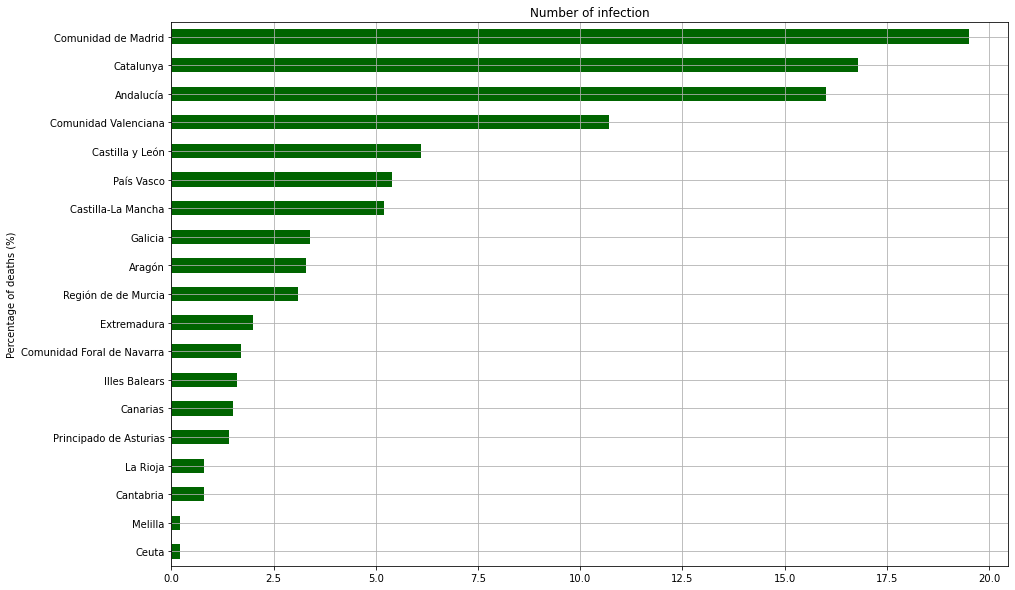

In [19]:
graph_bar('vertical', sort_data(region, 'Number of infection (%)'), 'Number of infection (%)', 'Number of infection', 
          'Percentage of deaths (%)', 'Darkgreen')

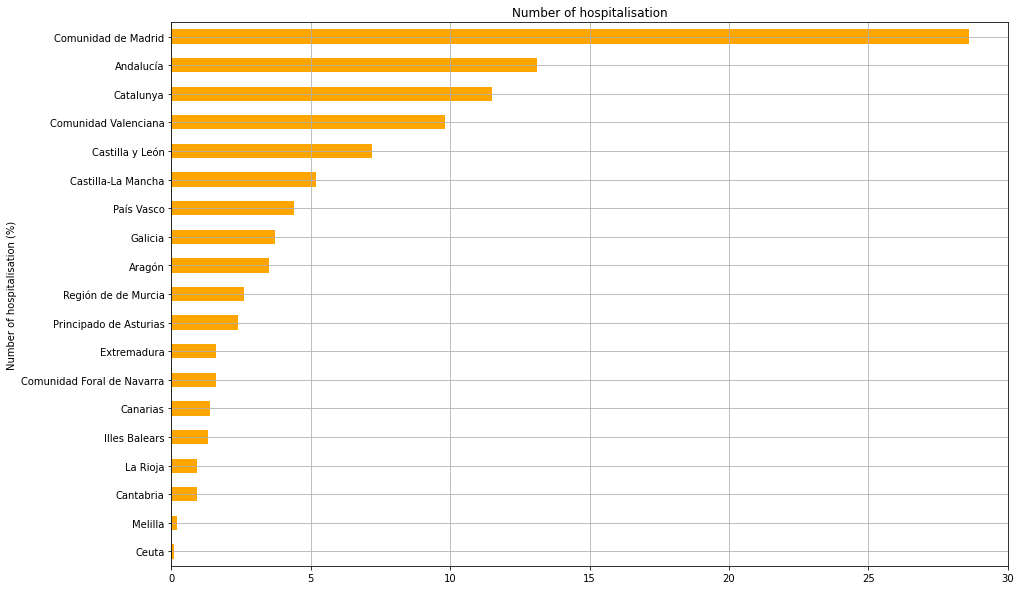

In [20]:
graph_bar('vertical', sort_data(region, 'Number of hospitalisation (%)'), 'Number of hospitalisation (%)', 'Number of hospitalisation', 
          'Number of hospitalisation (%)', 'Orange')

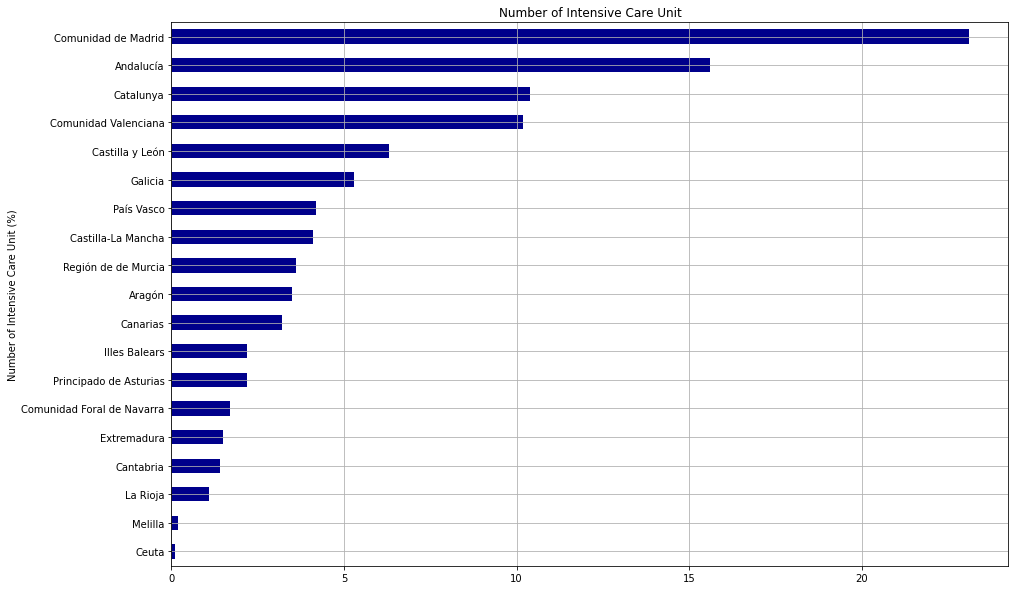

In [21]:
graph_bar('vertical', sort_data(region, 'Number of Intensive Care Unit (%)'), 'Number of Intensive Care Unit (%)',
          'Number of Intensive Care Unit', 'Number of Intensive Care Unit (%)', 'Darkblue')

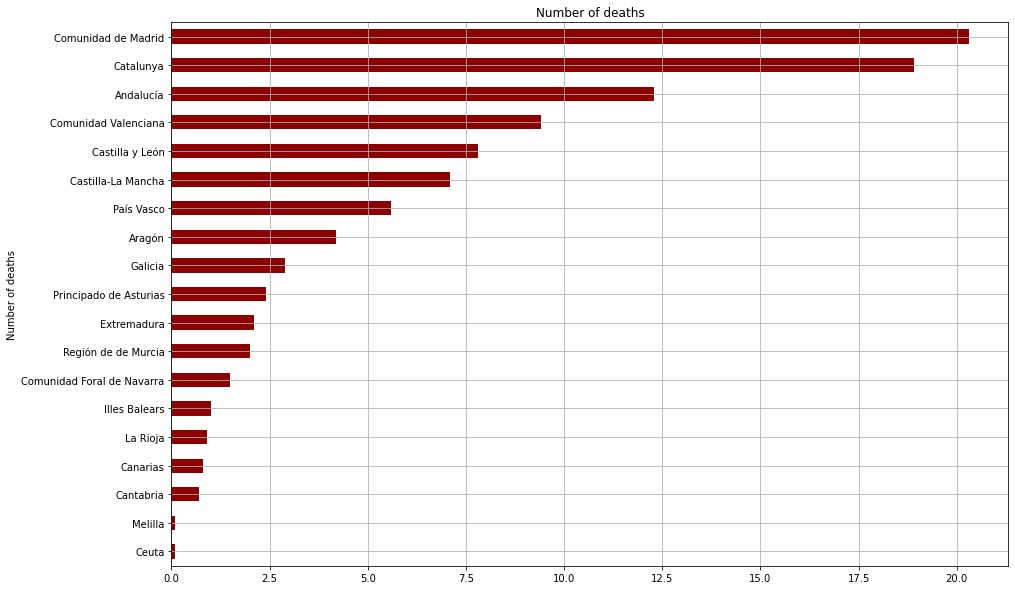

In [22]:
graph_bar('vertical', sort_data(region, 'Number of deaths (%)'), 'Number of deaths (%)',
          'Number of deaths', 'Number of deaths', 'Darkred')

### province:

In [23]:
db1.province.unique()

array(['Alicante/Alacant', 'Albacete', 'Almería', 'Ávila', 'Barcelona',
       'Badajoz', 'Bizkaia', 'Burgos', 'A Coruña', 'Cádiz', 'Cáceres',
       'Ceuta', 'Córdoba', 'Ciudad Real', 'Castellón/Castelló', 'Cuenca',
       'Las Palmas', 'Girona', 'Granada', 'Guadalajara', 'Huelva',
       'Huesca', 'Jaén', 'Lleida', 'León', 'La Rioja', 'Lugo', 'Madrid',
       'Málaga', 'Melilla', 'Murcia', 'Navarra', 'Asturias', 'Ourense',
       'Palencia', 'Illes Balears', 'Pontevedra', 'Cantabria',
       'Salamanca', 'Sevilla', 'Segovia', 'Soria', 'Gipuzkoa',
       'Tarragona', 'Teruel', 'Santa Cruz de Tenerife', 'Toledo',
       'Valencia/València', 'Valladolid', 'Araba/Álava', 'Zaragoza',
       'Zamora'], dtype=object)

In [24]:
db1['province'] = replace(db1, 'province', "Alicante/Alacant", "Alicante")
db1['province'] = replace(db1, 'province', "Castellón/Castelló", "Castellón")
db1['province'] = replace(db1, 'province', "Valencia/València", "Valencia")
db1['province'] = replace(db1, 'province', "Araba/Álavaa", "Araba")

### sex

In [25]:
db1.sex.value_counts()

M     150252
H     147442
NC      1357
Name: sex, dtype: int64

In [26]:
db1['sex'] = replace(db1, 'sex', "NC", "UKNOWN")

### age_interval

In [27]:
db1.age_interval.value_counts()

40-49    36763
50-59    36456
30-39    35577
20-29    34506
60-69    33959
10-19    30787
70-79    30570
80+      29740
0-9      28234
NC        2459
Name: age_interval, dtype: int64

In [28]:
db1['age_interval'] = replace(db1, 'age_interval', "NC", "UKNOWN")

## Pandemic Evolution

In [29]:
bydate = db1.groupby('date').sum().reset_index()

In [30]:
bydate.head()

,date,num_infections,num_hosp,num_uci,num_dead
0,2020-01-18,1,1,0,0
1,2020-01-31,1,0,0,0
2,2020-02-09,1,1,0,0
3,2020-02-12,3,0,0,0
4,2020-02-21,1,0,0,0


In [31]:
cumu_num_infections = bydate.num_infections.cumsum()
cumu_num_hosp = bydate.num_hosp.cumsum()
cumu_num_uci = bydate.num_uci.cumsum()
cumu_num_dead = bydate.num_dead.cumsum()

cumulative = pd.DataFrame({'cumu_num_infections': cumu_num_infections, 'cumu_num_hosp': cumu_num_hosp, 
                           'cumu_num_uci': cumu_num_uci, 'cumu_num_dead': cumu_num_dead})
cumulative = pd.concat([bydate.date, cumulative], axis = 1)

In [32]:
cumulative.head()

,date,cumu_num_infections,cumu_num_hosp,cumu_num_uci,cumu_num_dead
0,2020-01-18,1,1,0,0
1,2020-01-31,2,1,0,0
2,2020-02-09,3,2,0,0
3,2020-02-12,6,2,0,0
4,2020-02-21,7,2,0,0


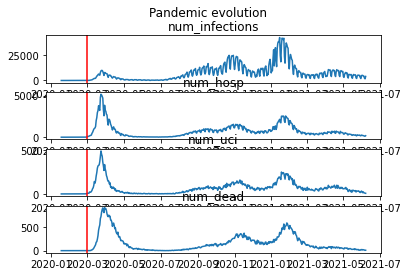

In [33]:
fig, axs = plt.subplots(4)
fig.suptitle('Pandemic evolution')
axs[0].plot(np.array(bydate.date), np.array(bydate.num_infections))
axs[0].set_title('num_infections')
axs[0].axvline('2020-03-01', color = 'r')
axs[1].plot(np.array(bydate.date), np.array(bydate.num_hosp))
axs[1].set_title('num_hosp')
axs[1].axvline('2020-03-01', color = 'r')
axs[2].plot(np.array(bydate.date), np.array(bydate.num_uci))
axs[2].set_title('num_uci')
axs[2].axvline('2020-03-01', color = 'r')
axs[3].plot(np.array(bydate.date), np.array(bydate.num_dead))
axs[3].set_title('num_dead')
axs[3].axvline('2020-03-01', color = 'r')
plt.rcParams['figure.figsize']=(15, 15);

### Number of infections

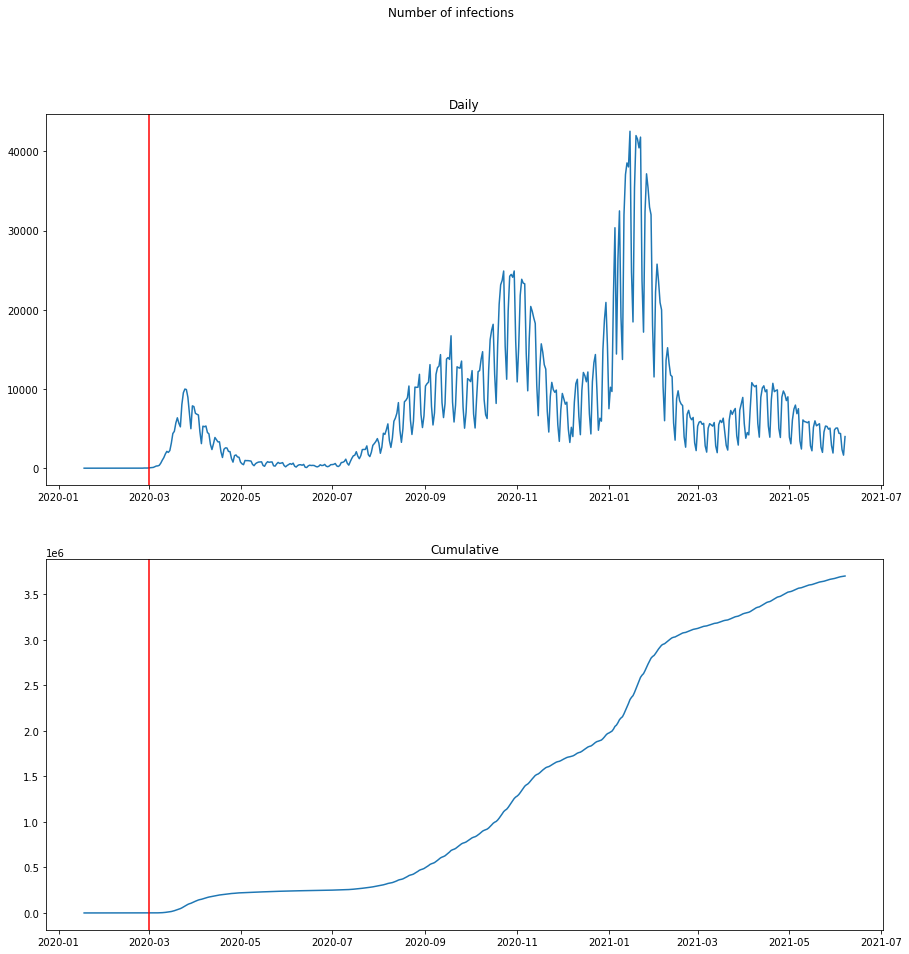

In [34]:
fig, axs = plt.subplots(2)
fig.suptitle('Number of infections')
axs[0].plot(np.array(bydate.date), np.array(bydate.num_infections))
axs[0].set_title('Daily')
axs[0].axvline('2020-03-01', color = 'r')
axs[1].plot(np.array(cumulative.date), np.array(cumulative.cumu_num_infections))
axs[1].set_title('Cumulative')
axs[1].axvline('2020-03-01', color = 'r')
plt.rcParams['figure.figsize']=(15, 15);

### Number of hospitalisations

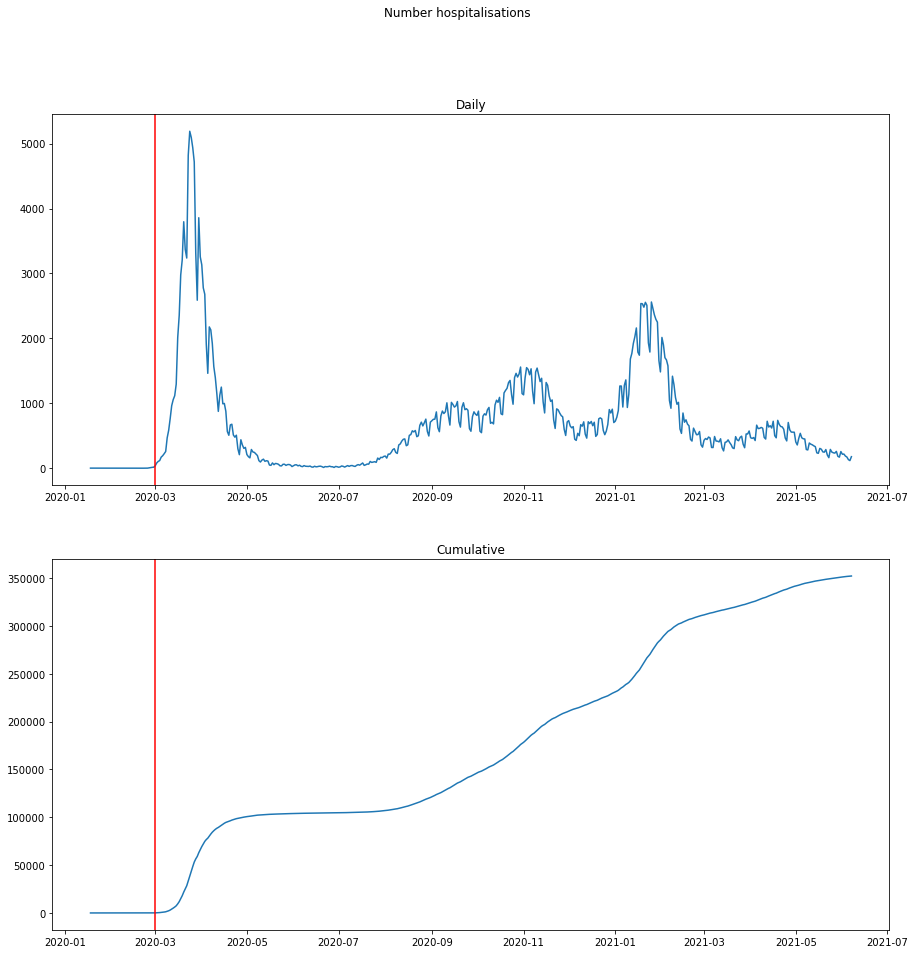

In [35]:
fig, axs = plt.subplots(2)
fig.suptitle('Number hospitalisations')
axs[0].plot(np.array(bydate.date), np.array(bydate.num_hosp))
axs[0].set_title('Daily')
axs[0].axvline('2020-03-01', color = 'r')
axs[1].plot(np.array(cumulative.date), np.array(cumulative.cumu_num_hosp))
axs[1].set_title('Cumulative')
axs[1].axvline('2020-03-01', color = 'r')
plt.rcParams['figure.figsize']=(15, 15);

### Intensive Care Units

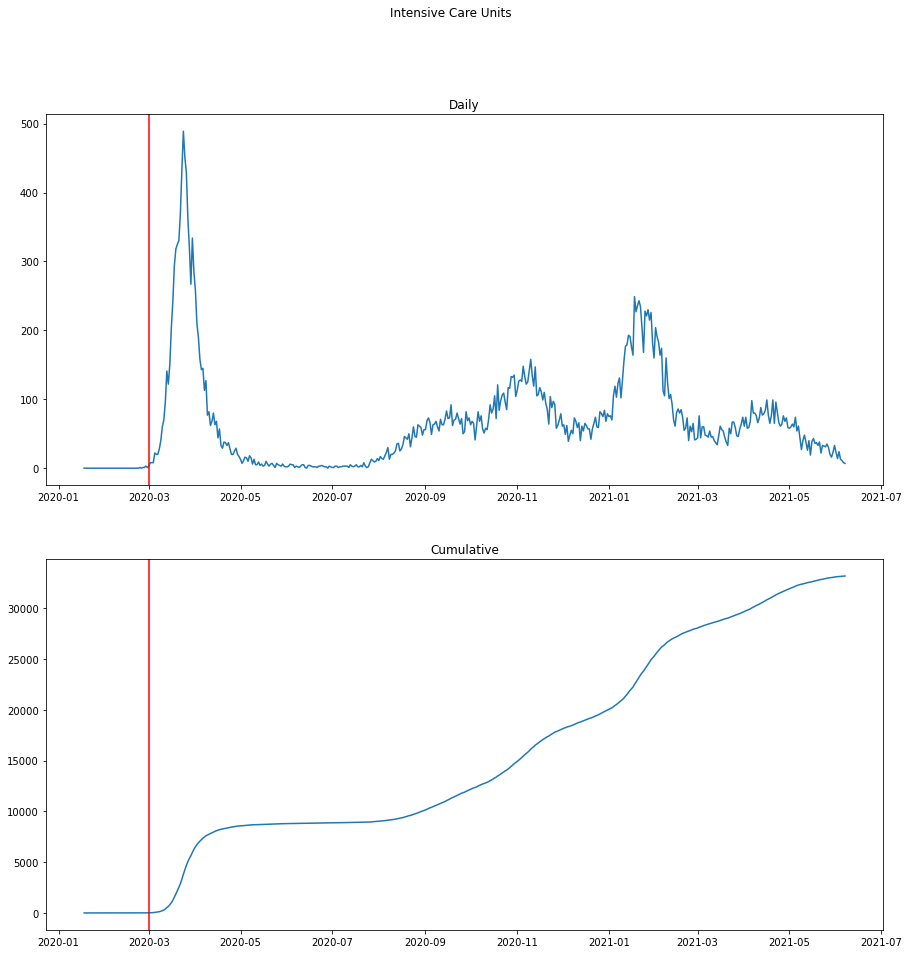

In [36]:
fig, axs = plt.subplots(2)
fig.suptitle('Intensive Care Units')
axs[0].plot(np.array(bydate.date), np.array(bydate.num_uci))
axs[0].set_title('Daily')
axs[0].axvline('2020-03-01', color = 'r')
axs[1].plot(np.array(cumulative.date), np.array(cumulative.cumu_num_uci))
axs[1].set_title('Cumulative')
axs[1].axvline('2020-03-01', color = 'r')
plt.rcParams['figure.figsize']=(15, 15);

### Deaths

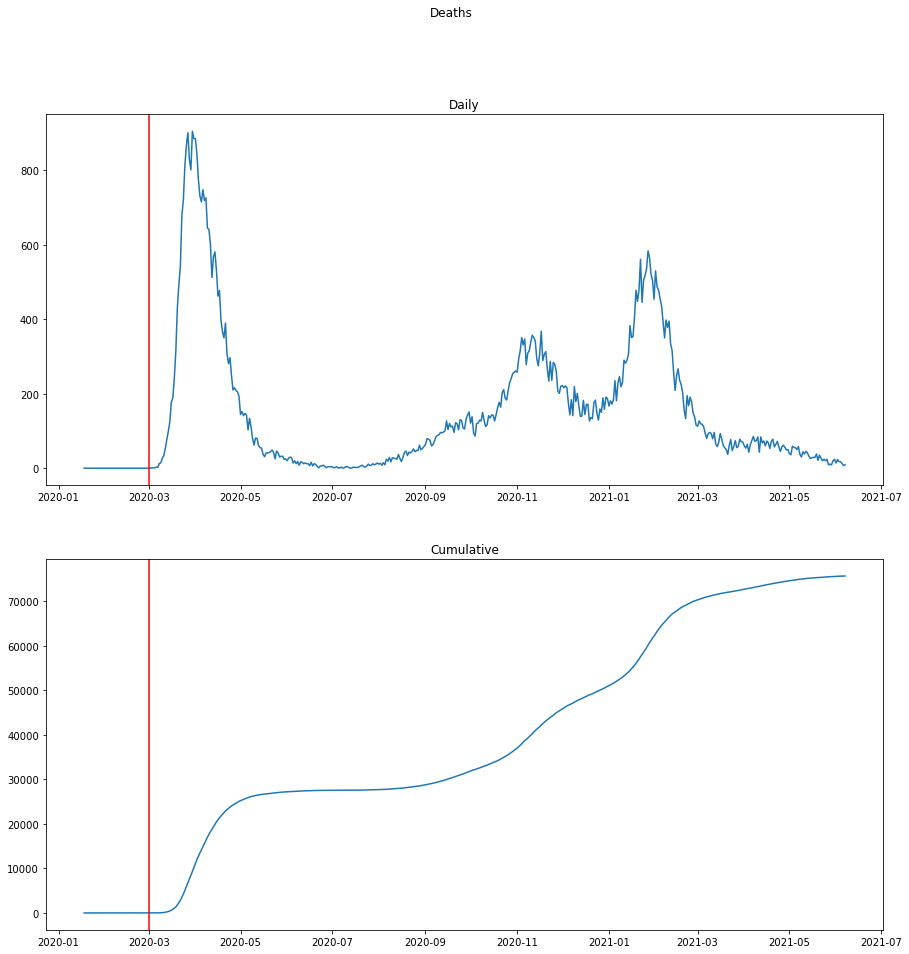

In [37]:
fig, axs = plt.subplots(2)
fig.suptitle('Deaths')
axs[0].plot(np.array(bydate.date), np.array(bydate.num_dead))
axs[0].set_title('Daily')
axs[0].axvline('2020-03-01', color = 'r')
axs[1].plot(np.array(cumulative.date), np.array(cumulative.cumu_num_dead))
axs[1].set_title('Cumulative')
axs[1].axvline('2020-03-01', color = 'r')
plt.rcParams['figure.figsize']=(15, 15);

## Age:

In [38]:
ages = db1.groupby('age_interval').sum()

### UKNOWN age is not significative. Let's drop this to have a cleaner view

In [39]:
ages = ages.drop('UKNOWN', axis = 0)

In [40]:
ages

,num_infections,num_hosp,num_uci,num_dead
age_interval,,,,
0-9,259049,2105,134,8
10-19,413700,2494,166,16
20-29,483916,8872,454,83
30-39,510447,18358,1234,209
40-49,628447,36792,3257,767
50-59,554887,56036,6950,2812
60-69,353394,63800,10426,7286
70-79,233780,69486,8871,16483
80+,252671,93540,1637,47886


In [41]:
ages['Number of infection (%)'] = freq_rel(ages, 'num_infections')
ages['Number of hospitalisation (%)'] = freq_rel(ages, 'num_hosp')
ages['Number of Intensive Care Unit (%)'] = freq_rel(ages, 'num_uci')
ages['Number of deaths (%)'] = freq_rel(ages, 'num_dead')

## Number of infections

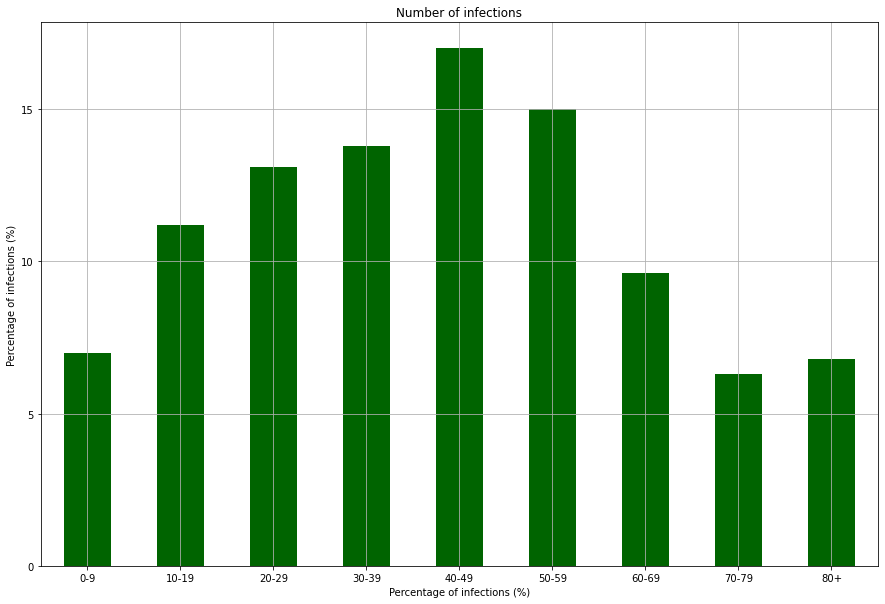

In [42]:
graph_bar('horizontal', ages, 'Number of infection (%)', 'Number of infections', 'Percentage of infections (%)', 'Darkgreen')

## Number of hospitalisation

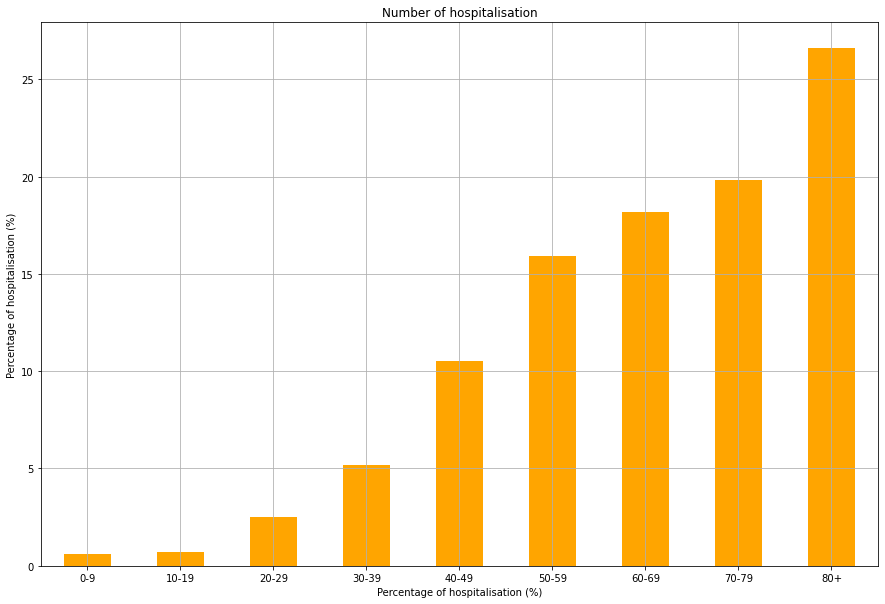

In [43]:
graph_bar('horizontal', ages, 'Number of hospitalisation (%)', 'Number of hospitalisation', 'Percentage of hospitalisation (%)', 'Orange')

## Number of Intensive Care Unit

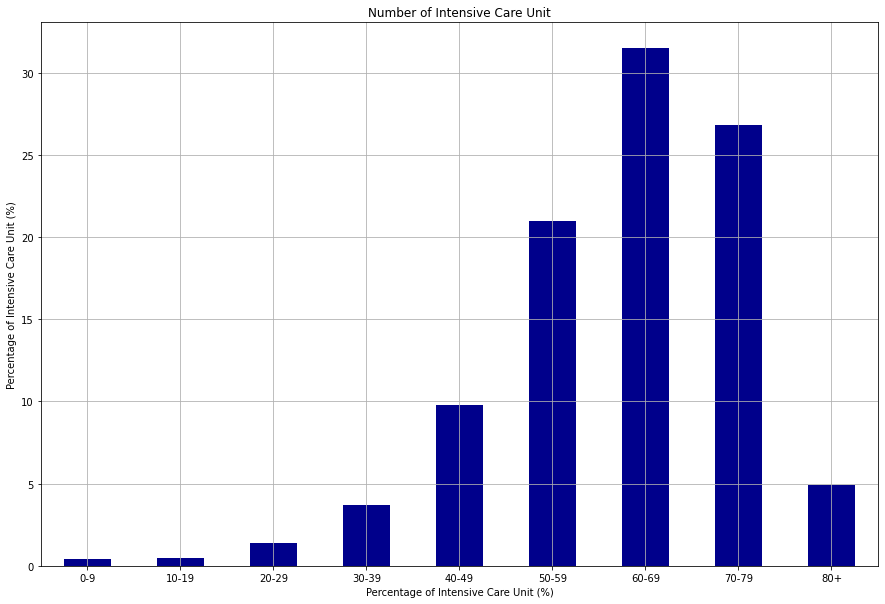

In [44]:
graph_bar('horizontal', ages, 'Number of Intensive Care Unit (%)', 'Number of Intensive Care Unit', 'Percentage of Intensive Care Unit (%)', 
          'Darkblue')

## Number of deaths

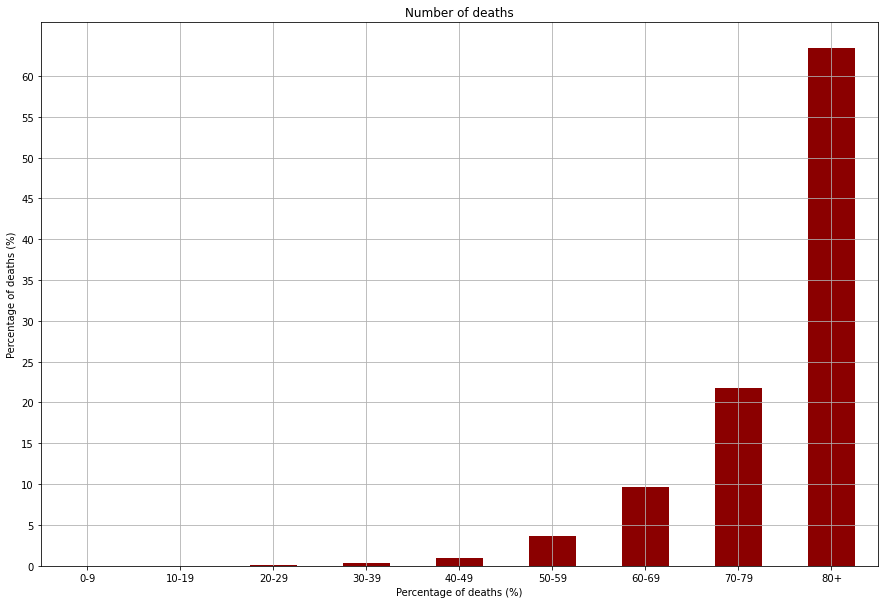

In [45]:
graph_bar('horizontal', ages, 'Number of deaths (%)', 'Number of deaths', 'Percentage of deaths (%)', 
          'Darkred')

## Severe cases

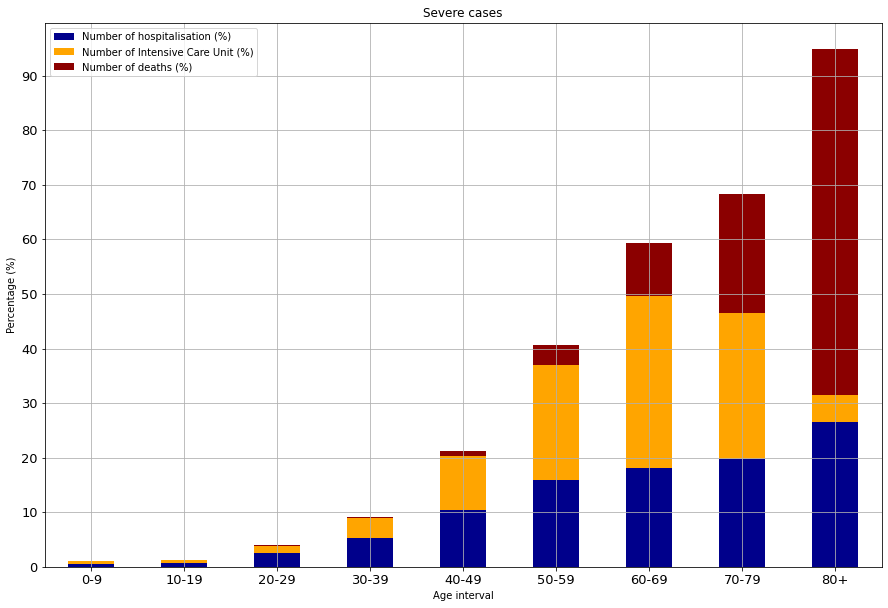

In [46]:
ages[['Number of hospitalisation (%)', 'Number of Intensive Care Unit (%)', 'Number of deaths (%)']][0:9].plot.bar(
    title = 'Severe cases', grid = 1 ,yticks = [i for i in range(0,100,10)],
    xlabel = 'Age interval', ylabel = 'Percentage (%)', rot=0, fontsize = 13, stacked = True, figsize = (15,10), 
    color = ['Darkblue', 'Orange', 'Darkred']);